In [3]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.metrics import mean_squared_error, r2_score

# read StudentPerformanceFactors
raw_data = pd.read_csv('StudentPerformanceFactors.csv')
print(raw_data.shape)

(6607, 20)


In [4]:
# remove rows with missing values

cols = raw_data.columns
categorical_cols = [
    'Parental_Involvement',
    'Access_to_Resources',
    'Extracurricular_Activities',
    'Motivation_Level',
    'Internet_Access',
    'Family_Income',
    'Teacher_Quality',
    'School_Type',
    'Peer_Influence',
    'Learning_Disabilities',
    'Parental_Education_Level',
    'Distance_from_Home',
    'Gender'
]

numerical_cols = [
    'Hours_Studied',
    'Attendance',
    'Sleep_Hours',
    'Previous_Scores',
    'Tutoring_Sessions',
    'Physical_Activity',
    'Exam_Score'
]

for col in categorical_cols:
  raw_data[col] = raw_data[col].replace('', np.nan)

raw_data.dropna(inplace=True)
print(raw_data.shape)

(6378, 20)


In [5]:
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split, GroupShuffleSplit
df = raw_data.copy()

In [6]:
# Feature Engineering
df["Internet_Access"] = df["Internet_Access"].map({"No": 0, "Yes": 1})
df["Motivation_Level"] = df["Motivation_Level"].map({"Low": 1, "Medium": 2, "High": 3})
df["Family_Income"] = df["Family_Income"].map({"Low": 1, "Medium": 2, "High": 3})
df["Teacher_Quality"] = df["Teacher_Quality"].map({"Low": 1, "Medium": 2, "High": 3})
df["School_Type"] = df["School_Type"].map({"Public": 0, "Private": 1})
df["Peer_Influence"] = df["Peer_Influence"].map({"Negative": 1, "Neutral": 2, "Postitive": 3})
df["Learning_Disabilities"] = df["Learning_Disabilities"].map({"No": 0, "Yes": 1})
df["Parental_Education_Level"] = df["Parental_Education_Level"].map({"High School": 1, "College": 2, "Postgraduate": 3})
df["Distance_from_Home"] = df["Distance_from_Home"].map({"Near": 1, "Moderate": 2, "Far": 3})
df["Gender"] = df["Gender"].map({"Female": 0, "Male": 1})
df["Extracurricular_Activities"] = df["Extracurricular_Activities"].map({"No": 0, "Yes": 1})
df["Parental_Involvement"] = df["Parental_Involvement"].map({"Low": 1, "Medium": 2, "High": 3})

In [7]:
#shuffle the data's indices in the data set
Splitter = GroupShuffleSplit(test_size=.10, n_splits=1, random_state = 7)
#seperate indices into train and split
train_indices, Cross_Validation_indices = next(Splitter.split(df, groups=df['Exam_Score']))
#seperate x values and y values by the indices for the corss validation set
x_train_Cross_Validation = df.iloc[Cross_Validation_indices]
x_test_Cross_Validation = df.iloc[Cross_Validation_indices]
y_train_Cross_Validation = df.iloc[Cross_Validation_indices]['Exam_Score']
y_test_Cross_Validation = df.iloc[Cross_Validation_indices]['Exam_Score']
x_train_Cross_Validation.shape, x_test_Cross_Validation.shape, y_train_Cross_Validation.shape, y_test_Cross_Validation.shape

((936, 20), (936, 20), (936,), (936,))

In [8]:
#seperate the train and test indices into x and y data sets for the non hierarchical set
x_train, x_test, y_train, y_test = train_test_split(df.iloc[train_indices], df.iloc[train_indices]['Exam_Score'], test_size=0.10, random_state=48)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
x_train = x_train.drop('Exam_Score', axis=1)
x_test = x_test.drop('Exam_Score', axis=1)

In [9]:
import statsmodels.api as sm
X=x_train[['Hours_Studied', 'Previous_Scores', 'Attendance', 'Tutoring_Sessions']]
X = sm.add_constant(X)
y=y_train
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     1610.
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        20:32:13   Log-Likelihood:                -11709.
No. Observations:                4897   AIC:                         2.343e+04
Df Residuals:                    4892   BIC:                         2.346e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                41.0327      0.353    116.227      0.000      40.341      41.725
Hours_Studied         0.2870      0.006     44.725      0.000       0.274       0.300
Previous_Scores       0.0489      0.003     18.630      0.000       0.044       0.054
Attendance            0.2006      0.003     61.917      0.000       0.194       0.207
Tutoring_Sessions     0.4891      0.031     15.865      0.000       0.429       0.550
==============================================================================
Omnibus:                     5935.341   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           786901.783
Skew:                           6.504   Prob(JB):                         0.00
Kurtosis:                      63.724   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

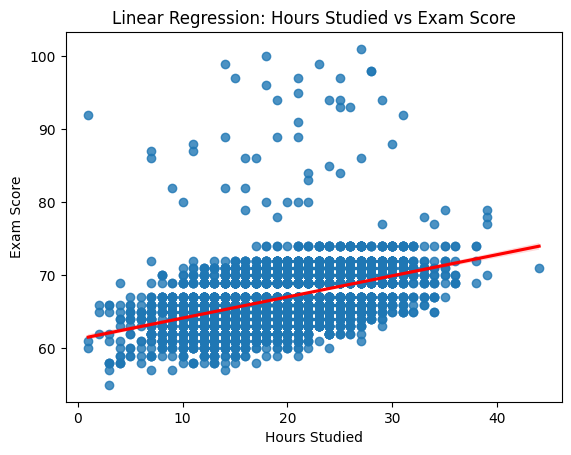

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Only works well for one predictor
sns.regplot(x=x_train['Hours_Studied'], y=y_train, line_kws={'color': 'red'})
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear Regression: Hours Studied vs Exam Score')
plt.show()

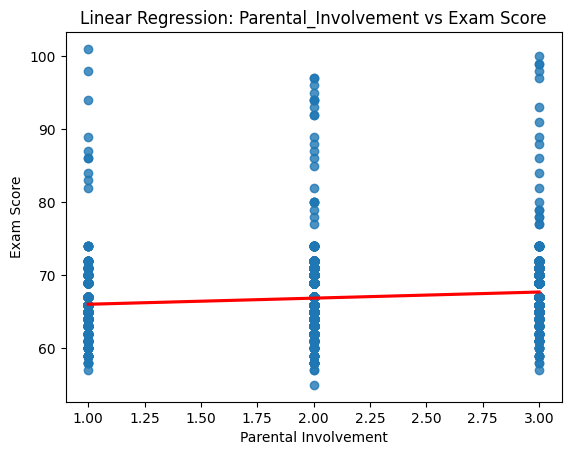

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x=x_train['Parental_Involvement'], y=y_train, line_kws={'color': 'red'})
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')
plt.title('Linear Regression: Parental_Involvement vs Exam Score')
plt.show()


In [15]:
#calculate MSE and R2
y_pred = model.predict(sm.add_constant(x_test[['Hours_Studied', 'Previous_Scores', 'Attendance', 'Tutoring_Sessions']]))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("R2: ", r2)

MSE:  6.883727761526708
R2:  0.5722452991259983


In [16]:
#Cross Validation of MSE and R2
y_pred_Cross_Validation = model.predict(sm.add_constant(x_test_Cross_Validation[['Hours_Studied', 'Previous_Scores', 'Attendance', 'Tutoring_Sessions']]))
mse_Cross_Validation = mean_squared_error(y_test_Cross_Validation, y_pred_Cross_Validation)
r2_Cross_Validation = r2_score(y_test_Cross_Validation, y_pred_Cross_Validation)
print("MSE: ", mse_Cross_Validation)
print("R2: ", r2_Cross_Validation)

MSE:  1.9995450157855177
R2:  0.6604545541477733
